# Ajuste da variação secular por spline dos pontos de dispersão do Observatório Magnético de Vassouras - RJ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import glob
import pandas as pd
import math as math
import os

In [2]:
VSS= np.loadtxt(fname='media_anual_VSS.csv', delimiter=',', usecols= (0,1,2,3,4,5,6,7))

In [3]:
VSS[:,4]

array([ 24308.,  24238.,  24206.,  24021.,  23968.,  23932.,  23895.,
        23853.,  23810.,  23764.,  23717.,  23668.,  23619.,  23569.,
        23520.,  23471.,  23424.,  23380.,  23339.,  23297.,  23257.,
        23213.,  23163.,  23111.,  23059.,  23004.,  22949.,  22891.,
        22830.,  22764.,  22694.,  22621.,  22547.,  22474.,  22400.,
        22357.,  22249.,  22166.,  22092.,  22018.,  21941.,  21848.,
        21766.,  21696.,  21658.,  21579.,  21501.,  21407.,  21320.,
        21259.,  21182.,  21102.,  21023.,  20935.,  20859.,  20782.,
        20699.,  20625.,  20531.,  20448.,  20376.,  20303.,  20205.,
        20132.,  20041.,  19952.,  19871.,  19740.,  19615.,  19559.,
        19489.,  19406.,  19320.,  19237.,  19151.,  19062.,  18961.,
        18888.,  18790.,  18715.,  18623.,  18564.,  18454.,  18361.,
        18274.,  18185.,  18106.,  18022.,  17927.,  17856.,  17759.,
        17699.,  17622.,  17537.,  17452.,  17338.,  17230.,  17099.,
        17031.,  169

In [4]:
def sec_var(a):
    "determine secular variation for components of geomagnetic field."
    '''
    a - column data
    '''
    
    N = a.size
    sv = np.zeros(N)
    
    for i in range(N-1):
        sv[i+1] = a[i+1] - a[i]
        #print(sv[i])
    return sv

In [5]:
#SECULAR VARIATION FOR VASSOURAS MAGNETIC OBSERVATORY DATA FROM 1915 TO 2015:

Year = VSS[:,0]
sv_x = sec_var(VSS[:,4])
sv_y = sec_var(VSS[:,5])
sv_z = sec_var(VSS[:,6])

In [6]:
print('year', len(Year))
print('sv_x', len(sv_x))

year 101
sv_x 101


In [7]:
sv_y
print('len y', len(sv_y))

len y 101


In [13]:


#plt.rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica']})

def splerp(t, control_points):
  if len(control_points) == 1:
    return control_points[0]

  derived_points = []
  for (x0, y0), (x1, y1) in zip(control_points, control_points[1:]):
    x = x0 + t*(x1-x0)
    y = y0 + t*(y1-y0)
    derived_points.append((x, y))

  return splerp(t, derived_points)


def plot_spline(control_points, fig_name="spline"):
  interpolated_points = []
  for t in np.arange(0.01, 1, 0.01):
    interpolated_points.append(splerp(t, control_points))
    
    plt.figure(0)
    plt.clf()
    plt.plot([p[0] for p in interpolated_points], [p[1] for p in interpolated_points], linestyle='solid', color='black', linewidth=2)
    plt.scatter(Year,sv_z, 4, label="VSS", color='gray')
#plt.title('Spline Curve with ' + str(len(control_points)) + ' Control Points')
    plt.xticks(np.arange(1915, 2016, 10))
    pylab.xlim([1915,2015])
    plt.xlabel('Year')
    plt.ylabel('$ dZ/dt$')
    plt.savefig(fig_name+"sv_z_spline.png")
    plt.show()
    
    
    
#plot_spline([(0, 0), (3, 6)], 'spline2')


## Spline para variação secular da componente X
*   sv = dX/dt

In [10]:
#plot_spline([(1915, -70), (1916, -32), (1917, -185), (1918, -53), (1919,-36),(1920,-37),(1921,-42.),  (1922,-43.),
 #      (1923,-46.), (1924,-47.), (1925,-49.),(1926, -49.), (1927,-50.),(1928, -49.), (1929,-49.), (1930,-47.), 
#     (1931,-44.), (1932,-41.), (1933,-42.),(1934, -40.), (1935,-44.),(1936, -50.), (1937,-52.), (1938,-52.),
#        (1939,-55.), (1940,-55.), (1941,-58.),(1942, -61.), (1943,-66.),(1944,-70.),(1945,-73.),(1946,-74.),(1947,-73.),
#        (1948,-74.), (1949,-43.), (1950,-108.),(1951,-83.), (1952,-74.),(1953,-74.),(1954,-77.),(1955,-93.),(1956,-82.), 
#        (1957,-70.), (1958,-38.), (1959,-79.), (1960,-78.), (1961,-94.),(1962,-87.),(1963,-61.),(1964,-77.),(1965,-80.),
#        (1966,-79.), (1967,-88.), (1968,-76.), (1969,-77.), (1970,-83.),(1971,-74.),(1972,-94.),(1973,-83.),(1974,-72.),
#        (1975,-73.), (1976,-98.), (1977,-73.), (1978,-91.), (1979,-89.),(1980,-81.),(1981,-131.),(1982,-125.),
#        (1983,-56.), (1984,-70.), (1985,-83.), (1986,-86.), (1987,-83.),(1988,-86.),(1989,-89.),(1990,-101.),(1991,-73.),
#        (1992,-73.), (1993, -98.),(1994,-75.), (1995,-92.),(1996, -59.),(1997, -110.),(1998, -93.),(1999, -87.),(2000, -89.), 
#        (2001,-79.), (2002, -84.),(2003,-95.), (2004,-71.),(2005, -97.),(2006, -60.), (2007, -77.),(2008, -85.), (2009, -85.),
#       (2010,-114.),(2013, -108.), (2011,-131.),(2012,-68.),(2014,-89.), (2015, -101.)], 'spline101')

## Plot Spline para variação secular da componete y:
* sv= dY/dt

In [11]:
#plot_spline([(1916, -62.), (1917, -67.), (1918, -42.), (1919, -59.), (1920, -58.), (1921, -46.), (1922, -57.), (1923, -52.),
#(1924,-55.), (1925, -57.),(1926, -56.), (1927, -53.), (1928, -48.), (1929, -43.), (1930, -42.), (1931, -42.), (1932, -43.),
#(1933, -37.), (1934, -46.), (1935, -34.),(1936, -33.), (1937, -33.), (1938, -34.), (1939, -23.), (1940, -26.),(1941, -27.), 
#(1942, -30.), (1943, -31.), (1944, -30.), (1945, -31.),(1946, -30.), (1947,-30.),  (1948, -31.), (1949, -38.), (1950, -36.),
#(1951, -3.),  (1952, -62.), (1953, -42.), (1954, -38.), (1955, -35.),(1956, -38.), (1957, -38.), (1958, -40.), (1959, -19.),
#(1960, -39.), (1961, -38.), (1962, -68.), (1963, -42.), (1964, -41.), (1965, -42.),(1966, -39.), (1967, -33.), (1968, -29.),
#(1969, -25.), (1970, -28.), (1971, -17.), (1972, -32.), (1973, -17.), (1974, -27.), (1975, -29.),(1976, -29.), (1977, -22.),
#(1978, -40.), (1979, -62.), (1980, 5.),   (1981, -14.), (1982, -2.),  (1983, 4.),   (1984, -33.), (1985, -8.),(1986, -13.),
#(1987, -6.),  (1988, -3.),  (1989, -13.), (1990, 3.),   (1991, 20.),  (1992, -5.),  (1993, 8.),   (1994, -10.), (1995,  1.),
#(1996, -4.),  (1997, 9.),   (1998, -11.), (1999, 12.),  (2000, 2.),   (2001, 4.),   (2002, 2.),   (2003, 0.),   (2004, 0.),
#(2005, 3.),(2006, -7.),  (2007, -2.),  (2008, -1.),  (2009, 4.),   (2010, 11.),  (2011, 8.),   (2012, -28.), (2013,41.), 
#(2014, 2.),   (2015, 8.)], 'spline100')



# Plot spline variação secular de Z

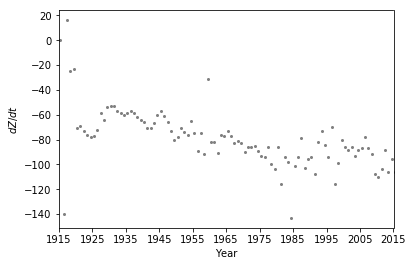

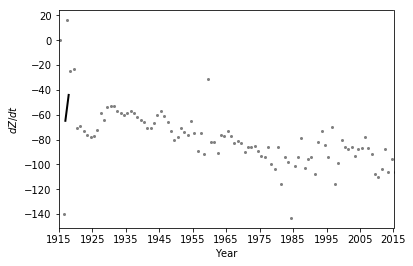

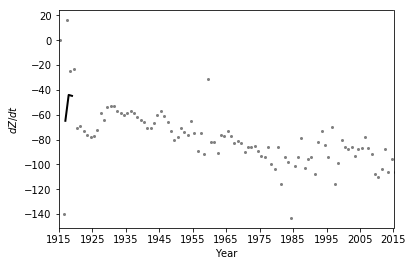

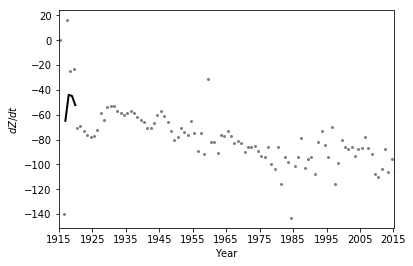

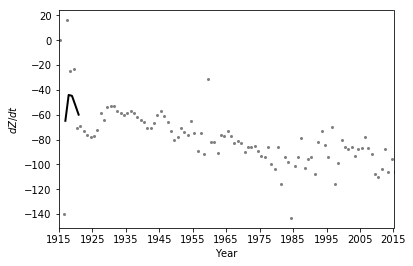

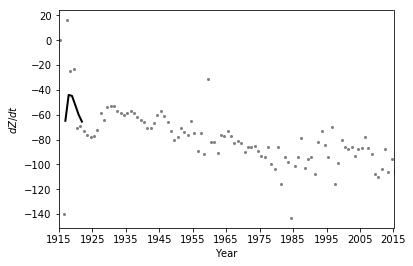

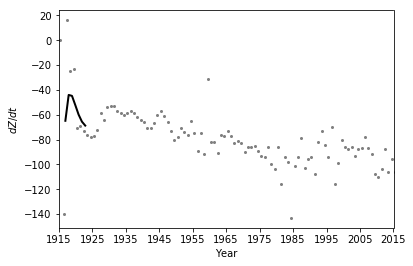

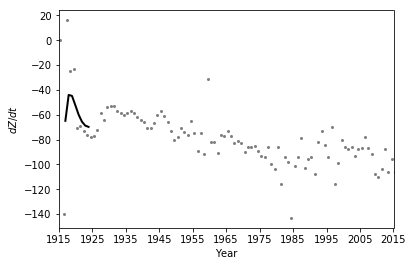

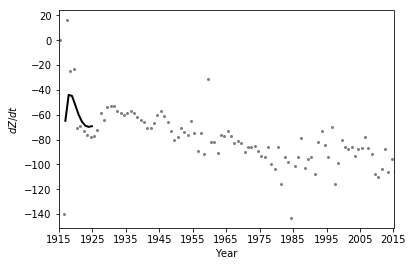

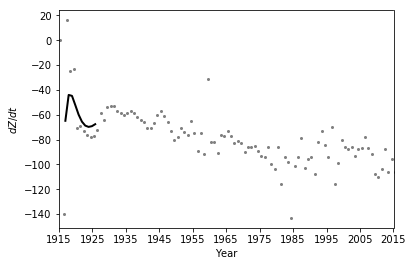

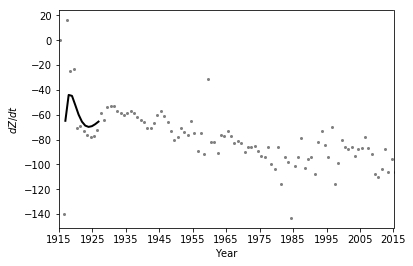

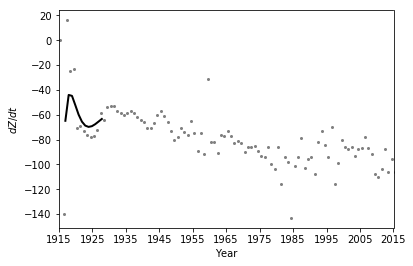

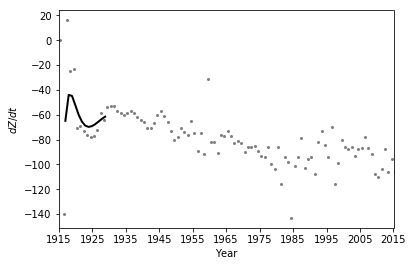

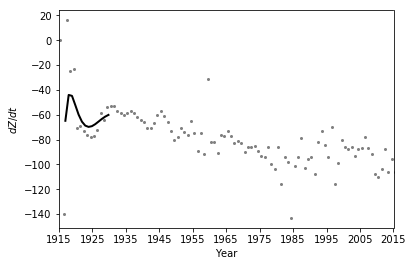

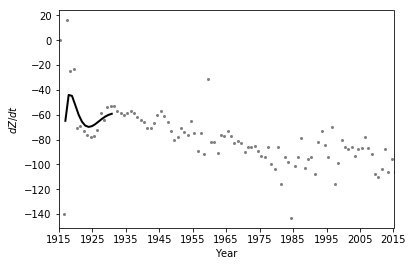

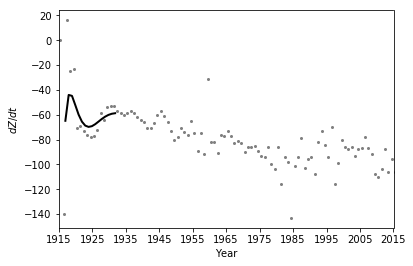

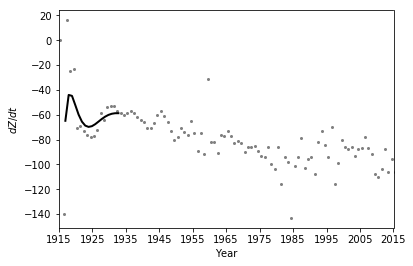

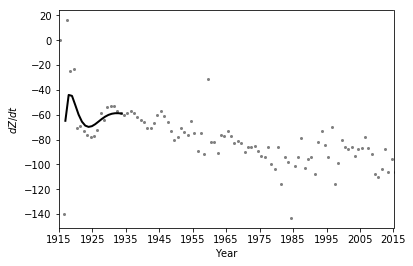

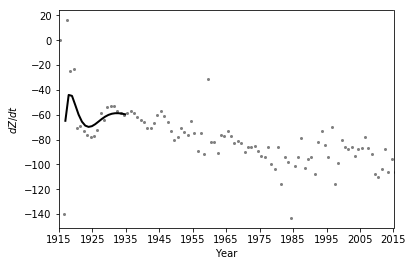

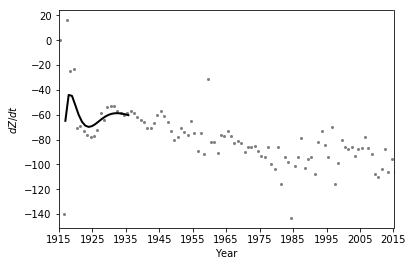

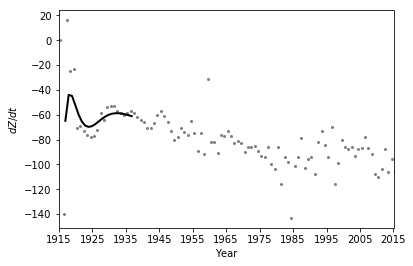

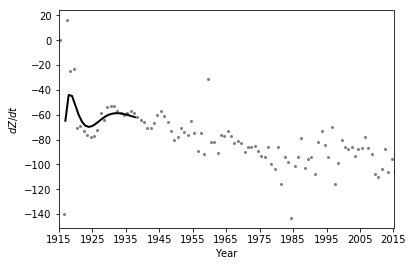

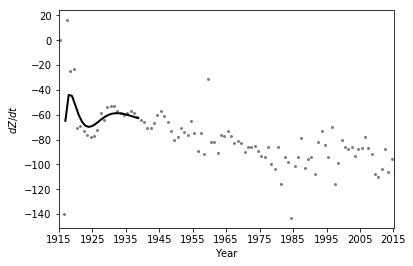

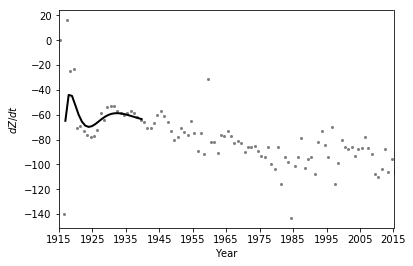

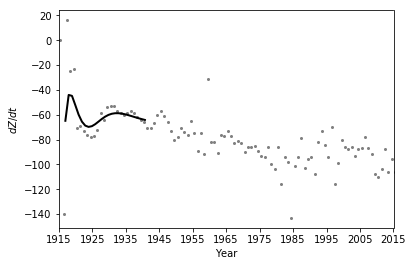

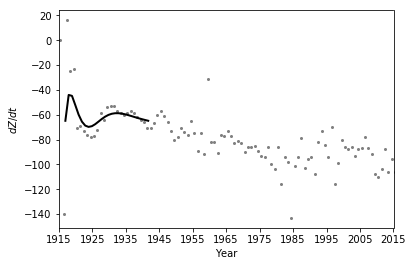

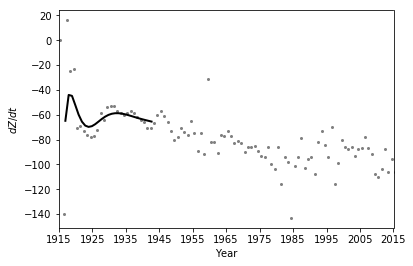

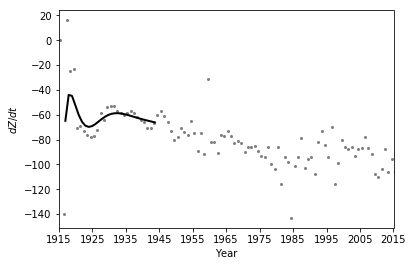

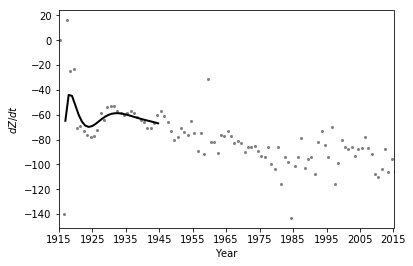

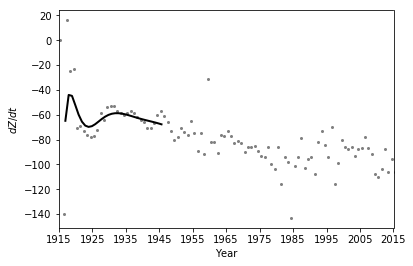

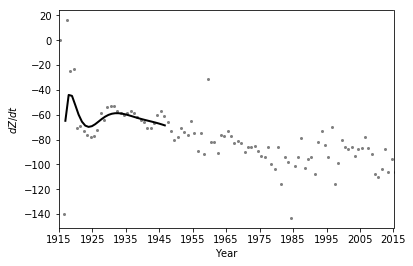

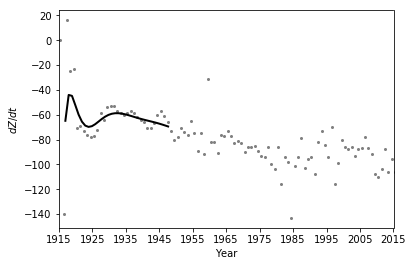

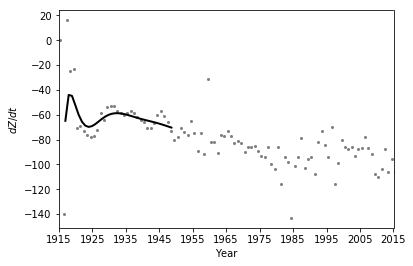

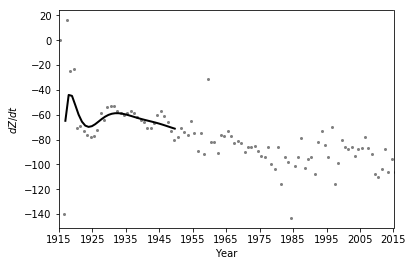

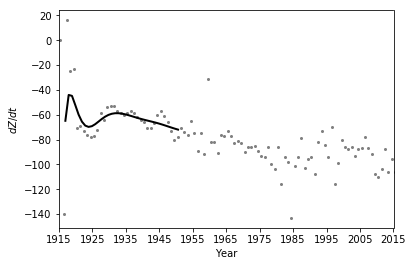

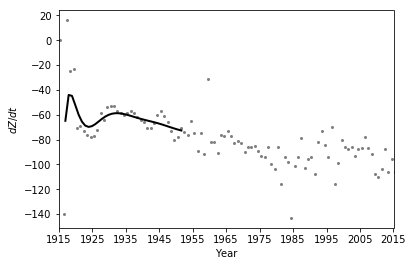

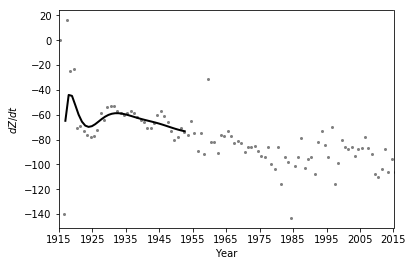

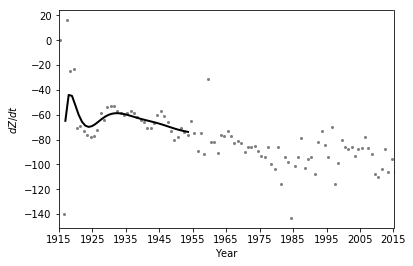

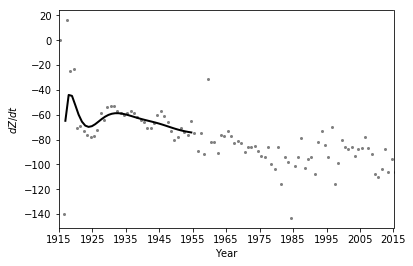

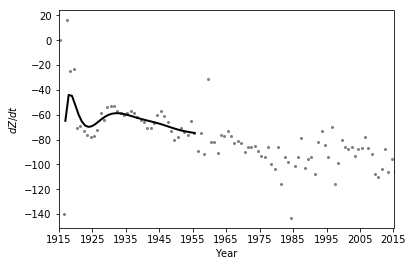

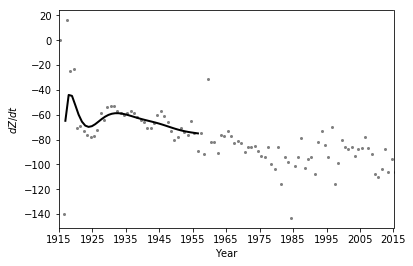

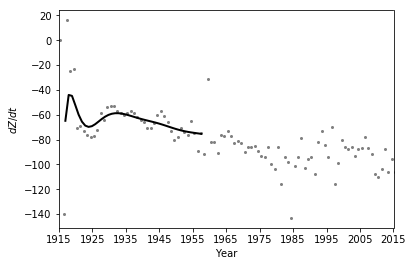

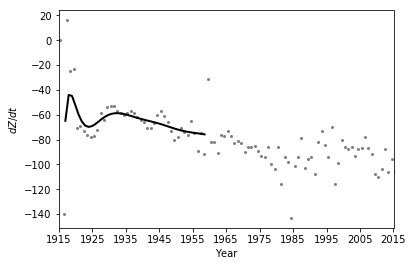

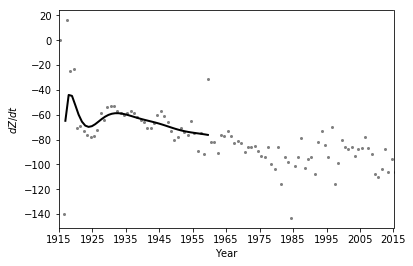

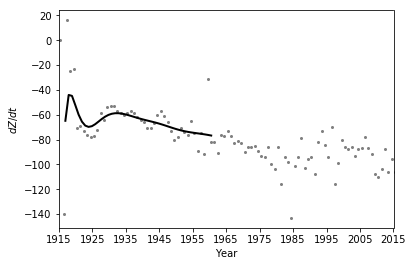

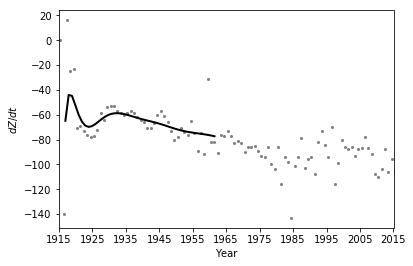

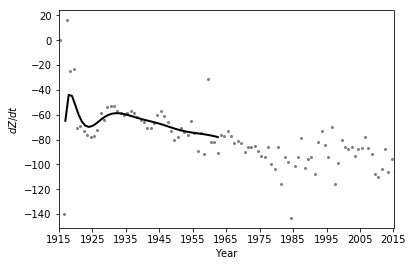

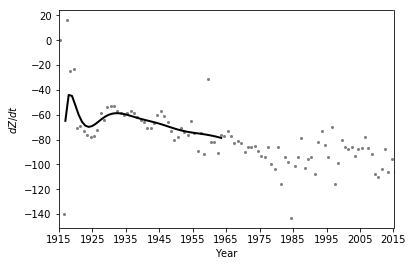

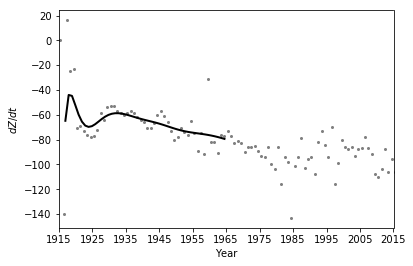

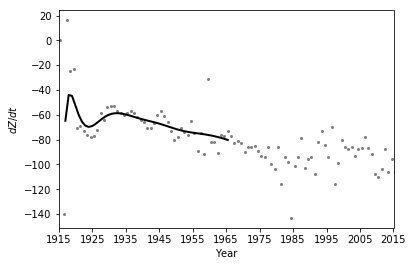

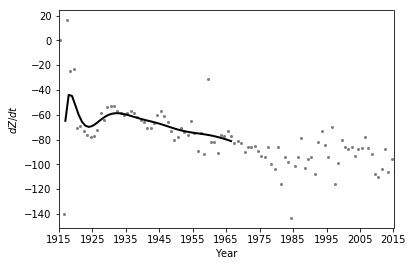

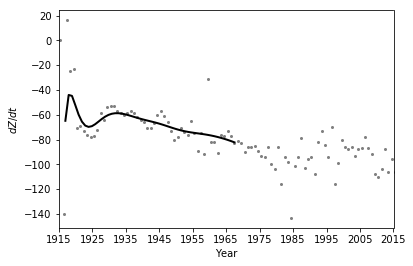

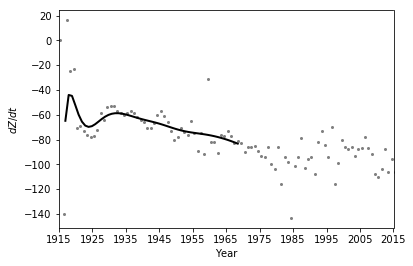

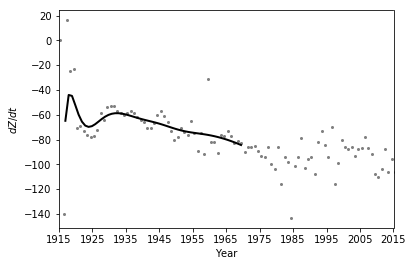

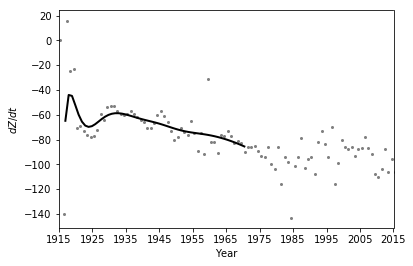

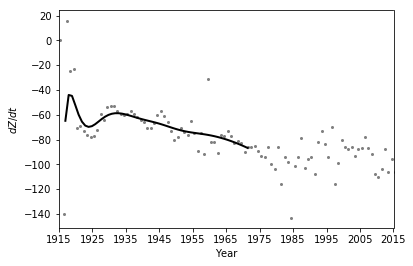

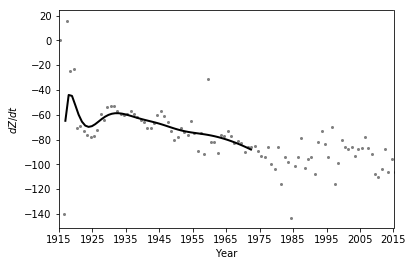

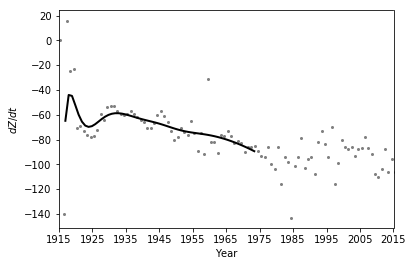

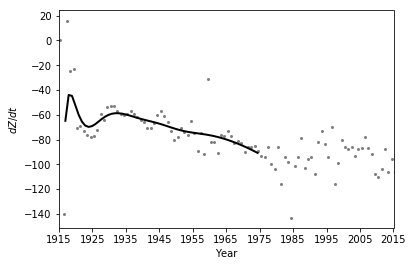

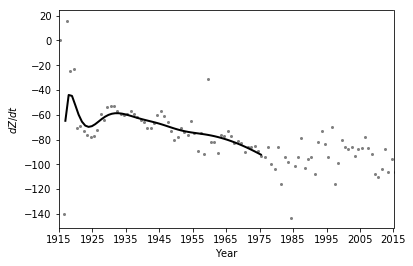

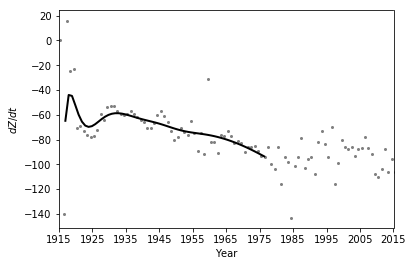

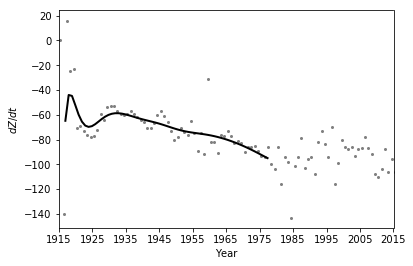

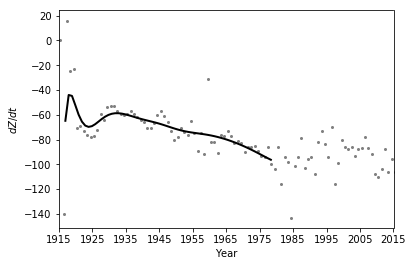

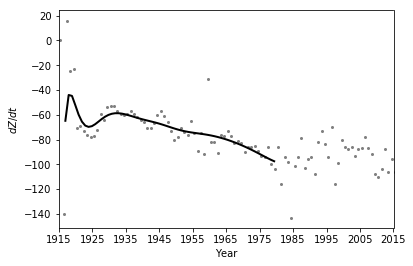

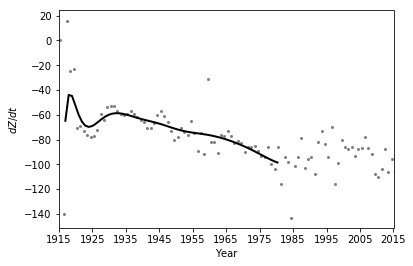

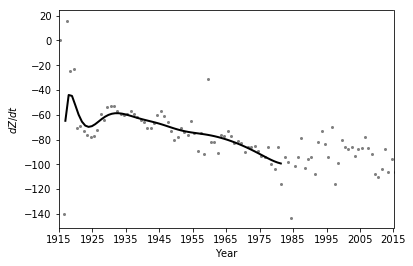

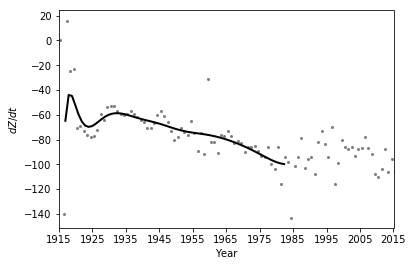

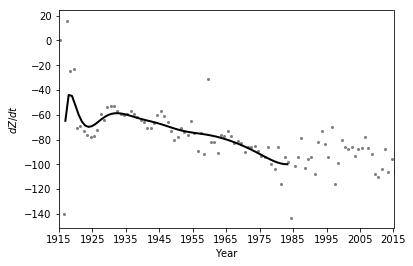

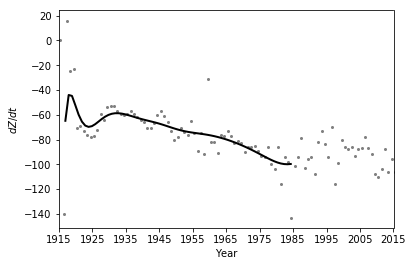

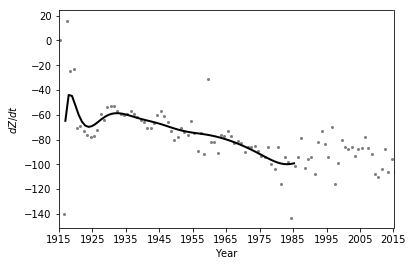

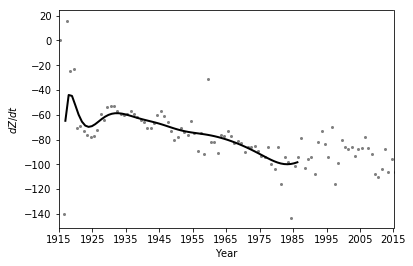

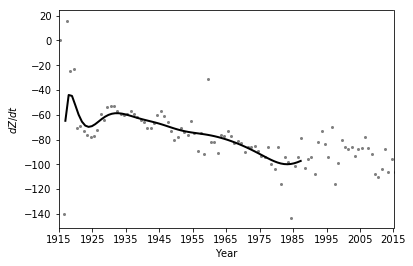

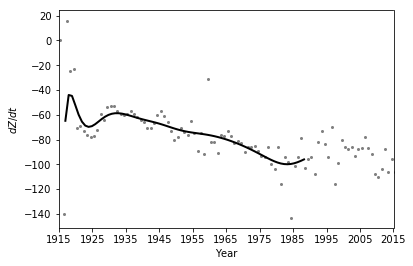

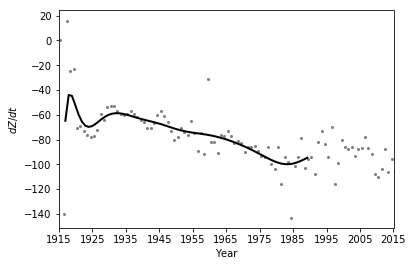

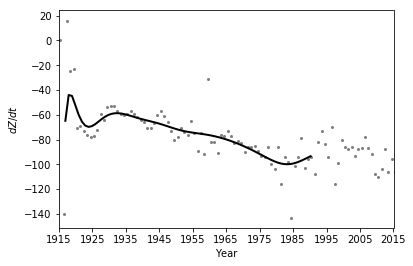

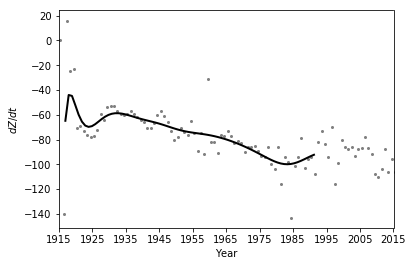

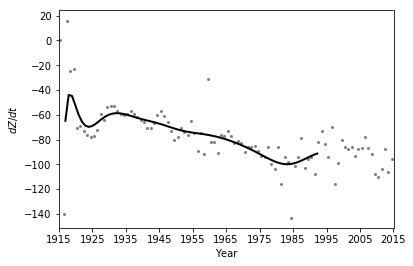

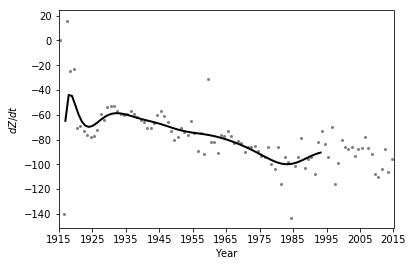

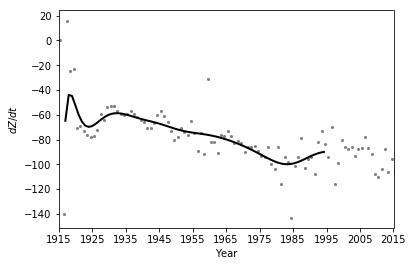

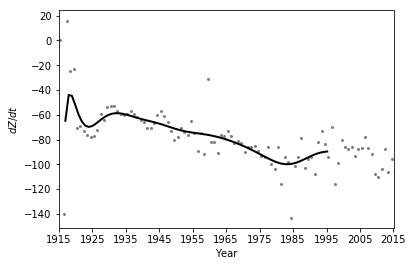

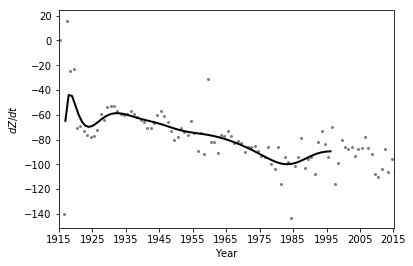

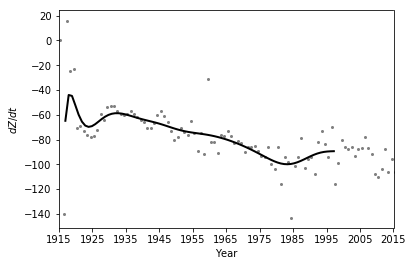

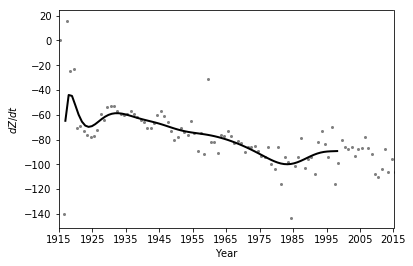

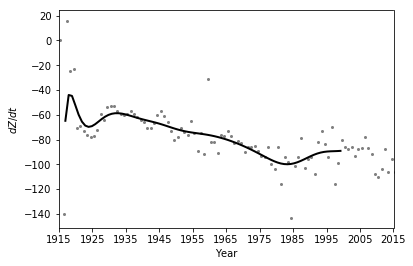

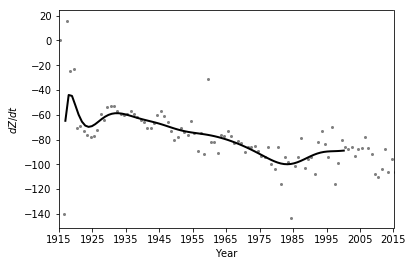

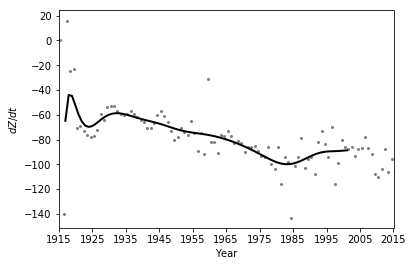

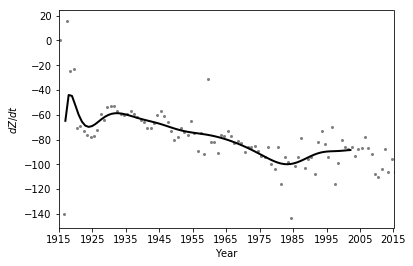

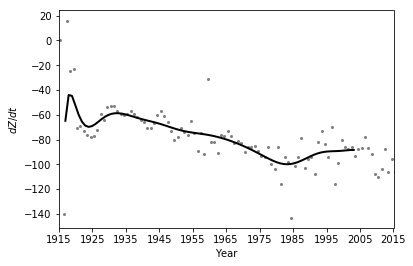

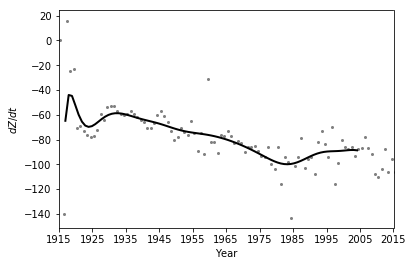

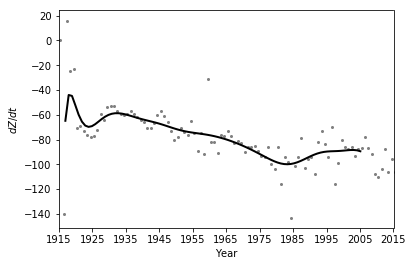

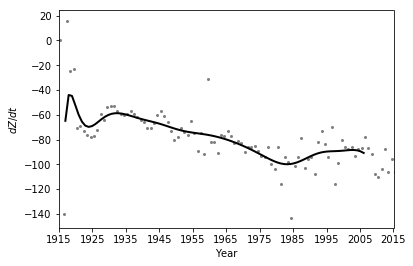

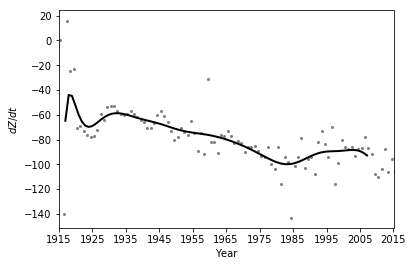

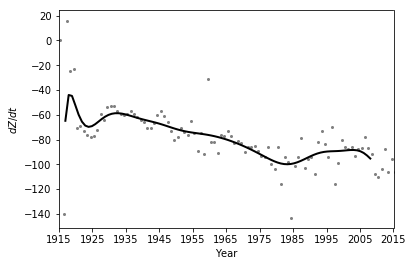

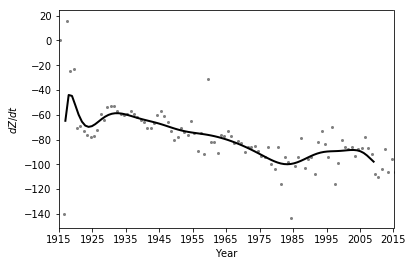

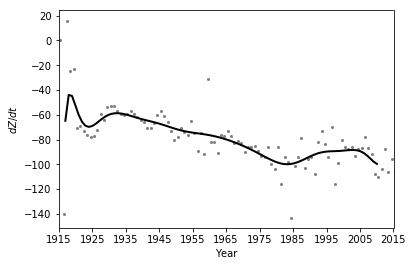

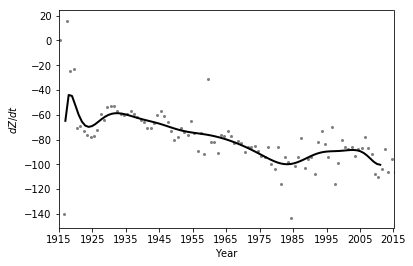

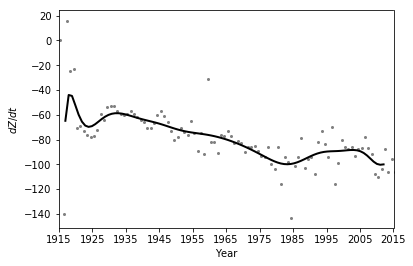

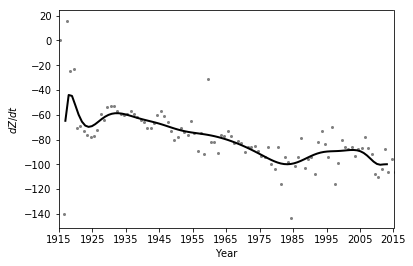

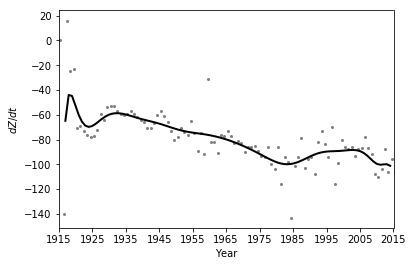

In [14]:
plot_spline([(1916, -140.), (1917, -16.), (1918, -25.), (1919, -23.), (1920, -71.),  (1921, -69.),  (1922, -73.), (1923, -76.),  (1924, -78.),
(1925, -77.), (1926, -72.),  (1927, -59.), (1928, -64.), (1929, -54.), (1930, -53.),  (1931, -53.),  (1932, -57.), (1933, -59.),  (1934, -60.),
(1935, -59.), (1936, -57.),  (1937, -59.), (1938, -62.), (1939, -64.), (1940, -66.),  (1941, -71.),  (1942, -71.), (1943, -67.),  (1944, -60.),
(1945, -57.), (1946, -61.),  (1947, -66.), (1948, -73.), (1949, -80.), (1950, -78.),  (1951, -71.),  (1952, -74.), (1953, -76.),  (1954, -65.),
(1955, -75.), (1956,-89.),   (1957, -75.), (1958, -92.), (1959, -31.), (1960, -82.),  (1961, -82.),  (1962, -91.), (1963, -76.),  (1964, -77.),
(1965, -73.), (1966, -77.),  (1967, -83.), (1968, -81.), (1969, -83.), (1970, -90.),  (1971, -86.),  (1972, -86.), (1973, -85.),  (1974, -89.),
(1975, -93.), (1976, -94.),  (1977, -86.), (1978, -100.),(1979, -104.),(1980, -86.),  (1981, -116.), (1982, -94.), (1983, -98.),  (1984, -143.),
(1985, -101.),(1986, -94.),  (1987, -79.), (1988, -103.),(1989, -96.), (1990, -94.),  (1991, -108.), (1992, -82.), (1993, -73.),  (1994, -84.),
(1995, -94.), (1996, -70.),  (1997, -116.),(1998, -99.), (1999, -80.), (2000, -86.),  (2001, -88.),  (2002, -86.), (2003, -93.),  (2004, -88.),
(2005, -87.), (2006, -78.),  (2007, -87.), (2008, -92.), (2009, -108.),(2010, -110.), (2011, -104.), (2012, -88.), (2013, -106.), (2014, -96.),
(2015, -106.)], 'spline100')